## Load Images: Load all images from the specified folder.

In [5]:
import os
from PIL import Image
import random
import itertools
from collections import defaultdict
from typing import List, Tuple, Dict, Literal
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from pathlib import Path

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("RGBA")
            images.append((filename, img))
    return images


image_folder = "/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/c823124ca76c00a9d3b79380e5bdfd29"
images = load_images_from_folder(image_folder)
images

[('f1-bg.jpg', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('f1-instructions-rev_v2-MPU.png',
  <PIL.Image.Image image mode=RGBA size=600x500>),
 ('endframe.jpg', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('game-4.png', <PIL.Image.Image image mode=RGBA size=203x203>),
 ('_preview.png', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('cta-rev.png', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('mpu-click.png', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('game-1.png', <PIL.Image.Image image mode=RGBA size=204x204>),
 ('cta.jpg', <PIL.Image.Image image mode=RGBA size=191x42>),
 ('endcard-rev.png', <PIL.Image.Image image mode=RGBA size=600x500>),
 ('f1-instructions.png', <PIL.Image.Image image mode=RGBA size=548x121>),
 ('engagement_instruction.png',
  <PIL.Image.Image image mode=RGBA size=600x500>),
 ('game-2.png', <PIL.Image.Image image mode=RGBA size=202x203>),
 ('game-3.png', <PIL.Image.Image image mode=RGBA size=203x203>)]

Image: f1-bg.jpg


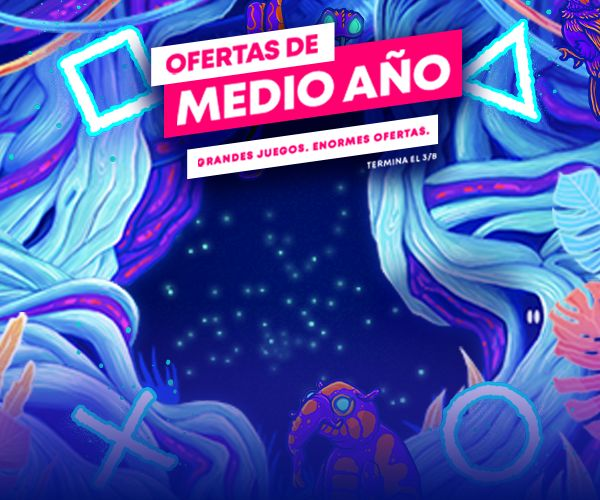

Image: f1-instructions-rev_v2-MPU.png


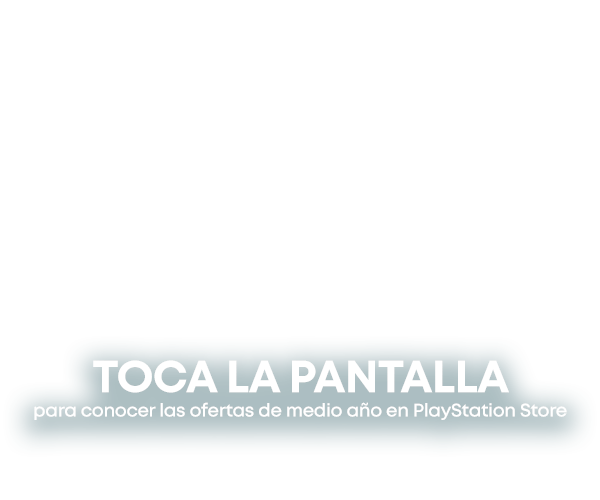

Image: endframe.jpg


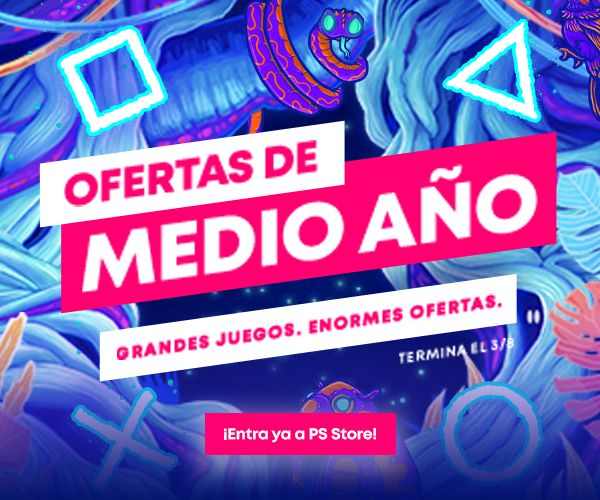

Image: game-4.png


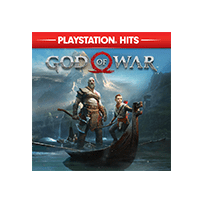

Image: _preview.png


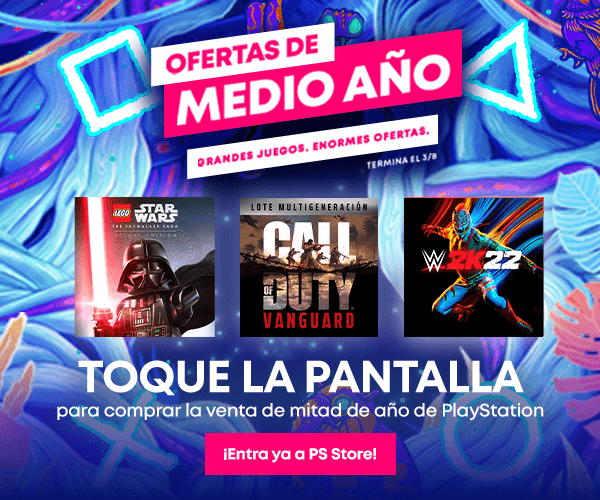

Image: cta-rev.png


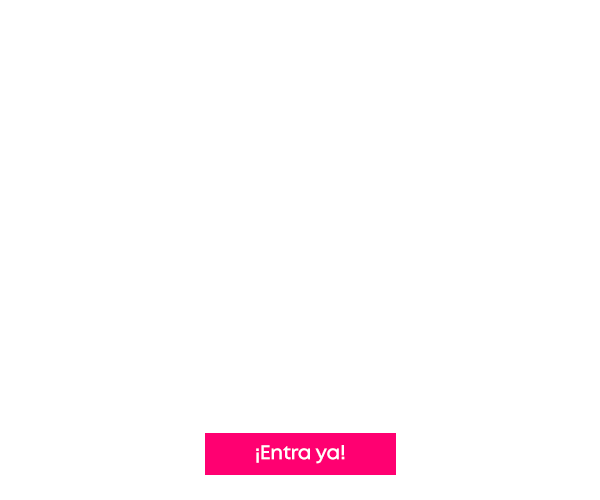

Image: mpu-click.png


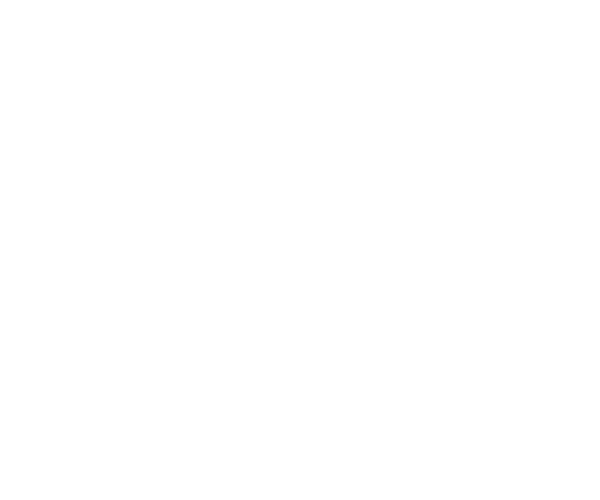

Image: game-1.png


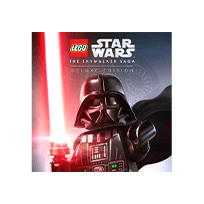

Image: cta.jpg


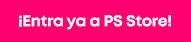

Image: endcard-rev.png


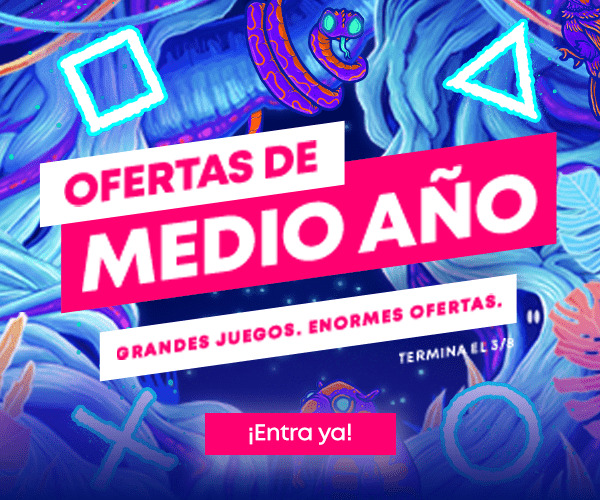

Image: f1-instructions.png


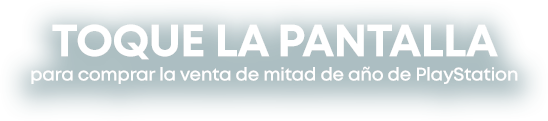

Image: engagement_instruction.png


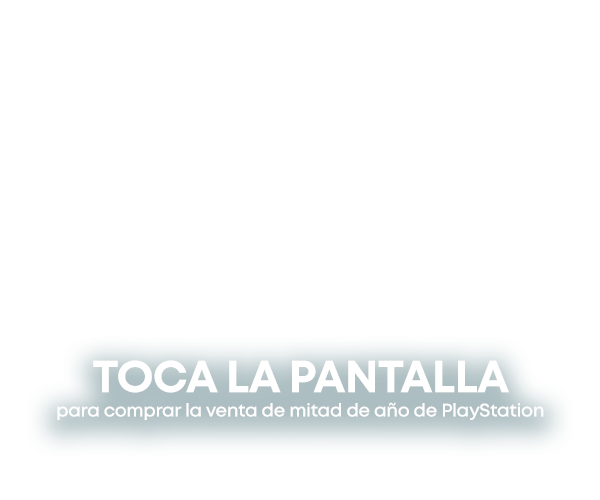

Image: game-2.png


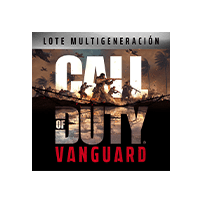

Image: game-3.png


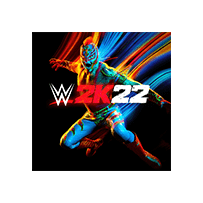

In [6]:
for filename, img in images:
    print(f"Image: {filename}")
    img.show()

### Object detection

In [7]:
# Object Detection model
def load_detection_model():
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

def detect_objects(image: Image.Image, model) -> List[Dict[str, Tuple]]:
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(image)
    predictions = model([img_tensor])[0]
    return predictions

def label_objects(predictions) -> Dict[str, Tuple]:
    # Assuming we have a function that maps detection labels to our categories
    labels = predictions['labels']
    boxes = predictions['boxes']
    labeled_boxes = {}
    for label, box in zip(labels, boxes):
        category = map_label_to_category(label)
        labeled_boxes[category] = box
    return labeled_boxes

In [ ]:
"""def detect_objects(image):
    # Placeholder for object detection logic
    detected_objects = ["logo", "text", "background_image", "CTA_button", "end_frame"]
    return detected_objects

# Detect objects in each image
image_objects = [(filename, detect_objects(img)) for filename, img in images]

# Assuming images is a list of tuples (filename, img)
image_objects = [(filename, detect_objects(img, model)) for filename, img in images]
"""

In [9]:
def map_label_to_category(label: str) -> str:
    # Map filenames to categories based on their names
    if 'logo' in label.lower():
        return "Logo"
    elif 'cta' in label.lower():
        return "CTA Button"
    elif 'icon' in label.lower():
        return "Icon"
    elif 'game' in label.lower():
        return "Product Image"
    elif 'text' in label.lower():
        return "Text Elements"
    elif 'bg' in label.lower() or 'background' in label.lower():
        return "Background"
    elif 'end' in label.lower() or 'endframe' in label.lower() or 'endcard' in label.lower():
        return "End Frame"
    elif 'instructions' in label.lower() or 'engagement' in label.lower():
        return "Text Elements"
    elif 'mpu' in label.lower() or 'preview' in label.lower():
        return "Interactive Elements"
    else:
        return "Unknown"



f1-bg.jpg: Background
f1-instructions-rev_v2-MPU.png: Text Elements
endframe.jpg: End Frame
game-4.png: Product Image
_preview.png: Interactive Elements
cta-rev.png: CTA Button
mpu-click.png: Interactive Elements
game-1.png: Product Image
cta.jpg: CTA Button
endcard-rev.png: End Frame
f1-instructions.png: Text Elements
engagement_instruction.png: Text Elements
game-2.png: Product Image
game-3.png: Product Image


The function map_label_to_category takes a filename as input and maps it to a category based on specific keywords in the filename.

In [ ]:
filenames = [
    'f1-bg.jpg', 'f1-instructions-rev_v2-MPU.png', 'endframe.jpg', 'game-4.png', 
    '_preview.png', 'cta-rev.png', 'mpu-click.png', 'game-1.png', 'cta.jpg', 
    'endcard-rev.png', 'f1-instructions.png', 'engagement_instruction.png', 
    'game-2.png', 'game-3.png'
]

mapped_labels = [(filename, map_label_to_category(filename)) for filename in filenames]
for filename, category in mapped_labels:
    print(f"{filename}: {category}")

In [7]:

# Load detection model
model = load_detection_model()

# Detect objects and label them
labeled_images = []
for filename, image in images:
    predictions = detect_objects(image, model)
    labeled_boxes = label_objects(predictions)
    labeled_images.append((filename, image, labeled_boxes))

print("Labeled images: ", labeled_images)


/home/temesgen_gebreabzgi/Tenv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/temesgen_gebreabzgi/Tenv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/temesgen_gebreabzgi/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 262MB/s] 


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

### image detection using yolo8

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
results = model.predict(image_folder)